# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [19]:
data = pd.read_csv('/content/5_a.csv')
data['y_pred'] = data['proba'].apply(lambda x : 1 if x >= 0.5 else 0)
print('Minimum Value of Proba', min(data['proba']))
print(data.shape[0])
print('-'*50)
print()
print()
print("The Value count of y")
print(data['y'].value_counts())
print()
print()
print("The Value count of y_pred")
print(data['y_pred'].value_counts())
print()
print()

print("Dataset")
print('-'*100)
print(data.head())


confusion_matrix = [[],
                    []]

def eval(data):
    tp,tn,fp,fn = 0,0,0,0
    for row in data.index:
        
        
        if data['y'][row] == 1:
            if data['y_pred'][row] == 1:
                tp += 1
            else:
                fn += 1
        if data['y'][row] == 0:
            if data['y_pred'][row] == 0:
                tn += 1
            else:
                fp += 1
    
    return tp,tn,fp,fn

tp,tn,fp,fn = eval(data)
print()
print()
print()
print("Confusion Matrix")
print('-'*100)
confusion_matrix[0].append(tn)
confusion_matrix[0].append(fn)
confusion_matrix[1].append(fp)
confusion_matrix[1].append(tp)
for i in range(len(confusion_matrix)):
    print(confusion_matrix[i],end='\n')

''''

            'Actual'
'Pred'        '0'    '1'
        '0'  'TN'   'FN' 
        '1'  'FP'   'TP'
'''

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2 * precision * recall)/(precision + recall)
print()
print()
print()
print("F1 Score")
print('-'*100)
print(f1_score)

print()
print()
print("Accuracy score")
print('-'*100)
print((tp+tn)/(tp+fp+fn+tn))


print(len(np.unique(data['proba'])))



Minimum Value of Proba 0.5000185949718864
10100
--------------------------------------------------


The Value count of y
1.0    10000
0.0      100
Name: y, dtype: int64


The Value count of y_pred
1    10100
Name: y_pred, dtype: int64


Dataset
----------------------------------------------------------------------------------------------------
     y     proba  y_pred
0  1.0  0.637387       1
1  1.0  0.635165       1
2  1.0  0.766586       1
3  1.0  0.724564       1
4  1.0  0.889199       1



Confusion Matrix
----------------------------------------------------------------------------------------------------
[0, 0]
[100, 10000]



F1 Score
----------------------------------------------------------------------------------------------------
0.9950248756218906


Accuracy score
----------------------------------------------------------------------------------------------------
0.9900990099009901
10100


In [31]:
from tqdm import tqdm
def eval_auc(data):
    tp,tn,fp,fn = 0,0,0,0
    for idx in range(len(data)):
        if data[idx][0] == 1:
            if data[idx][2] == 1:
                tp += 1
            else:
                fn += 1
        if data[idx][0] == 0:
            if data[idx][2] == 0:
                tn += 1
            else:
                fp += 1
    
    return tp,tn,fp,fn


In [16]:
from tqdm import tqdm
from numpy import genfromtxt
my_data = genfromtxt('/content/5_a.csv', delimiter=',')
new_data = np.hstack((my_data,np.zeros((my_data.shape[0],1))))
new_data = new_data[new_data[:,1].argsort()[::-1]]


unique_proba = np.sort(np.unique(new_data[1:,1]))[::-1]
print(new_data)

x = []
y = []
for proba in tqdm(unique_proba):
    for idx in range(len(new_data)):
        if new_data[idx][1] >= proba:
            new_data[idx][2] = 1
        else:
            new_data[idx][2] = 0
    
    tp,tn,fp,fn = eval_auc(new_data)
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    x.append(tpr)
    y.append(fpr)

x = np.array(x)
y = np.array(y)
np.trapz(x,y)


[[       nan        nan 0.        ]
 [1.         0.89996535 0.        ]
 [1.         0.89982831 0.        ]
 ...
 [1.         0.50005801 0.        ]
 [1.         0.50004734 0.        ]
 [1.         0.50001859 0.        ]]


100%|██████████| 10100/10100 [05:18<00:00, 31.71it/s]


0.48829900000000004

No handles with labels found to put in legend.


Text(0.5, 1.0, 'AUROC')

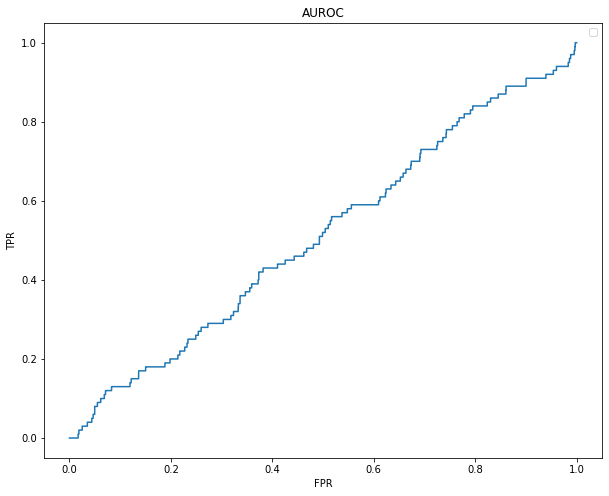

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title('AUROC')

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [9]:
data2 = pd.read_csv('/content/5_b.csv')
data2['y_pred'] = data2['proba'].apply(lambda x : 1 if x >= 0.5 else 0)
print('Minimum Value of Proba', min(data2['proba']))
print(data2.shape[0])
print('-'*50)
print()
print()
print("The Value count of y")
print(data2['y'].value_counts())
print()
print()
print("The Value count of y_pred")
print(data2['y_pred'].value_counts())
print()
print()

print("Dataset")
print('-'*100)
print(data2.head())


confusion_matrix = [[],
                    []]

def eval(data2):
    tp,tn,fp,fn = 0,0,0,0
    for row in data2.index:
        
        
        if data2['y'][row] == 1:
            if data2['y_pred'][row] == 1:
                tp += 1
            else:
                fn += 1
        if data2['y'][row] == 0:
            if data2['y_pred'][row] == 0:
                tn += 1
            else:
                fp += 1
    
    return tp,tn,fp,fn

tp,tn,fp,fn = eval(data2)
print()
print()
print()
print("Confusion Matrix")
print('-'*100)
confusion_matrix[0].append(tn)
confusion_matrix[0].append(fn)
confusion_matrix[1].append(fp)
confusion_matrix[1].append(tp)
for i in range(len(confusion_matrix)):
    print(confusion_matrix[i],end='\n')

''''

            'Actual'
'Pred'        '0'    '1'
        '0'  'TN'   'FN' 
        '1'  'FP'   'TP'
'''

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2 * precision * recall)/(precision + recall)
print()
print()
print()
print("F1 Score")
print('-'*100)
print(f1_score)

print()
print()
print("Accuracy score")
print('-'*100)
print((tp+tn)/(tp+fp+fn+tn))


print(len(np.unique(data2['proba'])))



Minimum Value of Proba 0.10000141285578913
10100
--------------------------------------------------


The Value count of y
0.0    10000
1.0      100
Name: y, dtype: int64


The Value count of y_pred
0    9806
1     294
Name: y_pred, dtype: int64


Dataset
----------------------------------------------------------------------------------------------------
     y     proba  y_pred
0  0.0  0.281035       0
1  0.0  0.465152       0
2  0.0  0.352793       0
3  0.0  0.157818       0
4  0.0  0.276648       0



Confusion Matrix
----------------------------------------------------------------------------------------------------
[9761, 45]
[239, 55]



F1 Score
----------------------------------------------------------------------------------------------------
0.2791878172588833


Accuracy score
----------------------------------------------------------------------------------------------------
0.9718811881188119
10100


In [13]:
from tqdm import tqdm
from numpy import genfromtxt
my_data2 = genfromtxt('/content/5_b.csv', delimiter=',')
new_data2 = np.hstack((my_data2,np.zeros((my_data2.shape[0],1))))
new_data2 = new_data2[new_data2[:,1].argsort()[::-1]]


unique_proba = np.sort(np.unique(new_data2[1:,1]))[::-1]
print(new_data2)

x = []
y = []
for proba in tqdm(unique_proba):
    for idx in range(len(new_data2)):
        if new_data2[idx][1] >= proba:
            new_data2[idx][2] = 1
        else:
            new_data2[idx][2] = 0
    
    tp,tn,fp,fn = eval_auc(new_data2)
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    x.append(tpr)
    y.append(fpr)

x = np.array(x)
y = np.array(y)
np.trapz(x,y)


[[       nan        nan 0.        ]
 [1.         0.59529418 0.        ]
 [1.         0.5948084  0.        ]
 ...
 [0.         0.10016508 0.        ]
 [0.         0.1001608  0.        ]
 [0.         0.10000141 0.        ]]


100%|██████████| 10100/10100 [05:16<00:00, 31.90it/s]


0.9377570000000001

No handles with labels found to put in legend.


Text(0.5, 1.0, 'AUROC 5_b.csv')

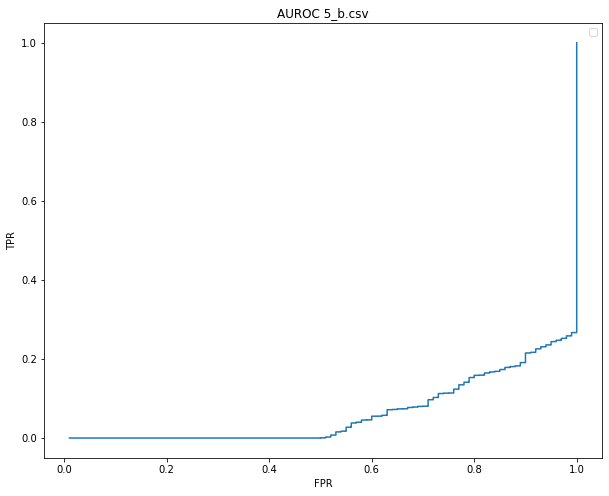

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title('AUROC 5_b.csv')

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [32]:
from tqdm import tqdm
from numpy import genfromtxt
my_data2 = genfromtxt('/content/5_c.csv', delimiter=',')
new_data2 = np.hstack((my_data2,np.zeros((my_data2.shape[0],1))))
new_data2 = new_data2[new_data2[:,1].argsort()[::-1]]


unique_proba = np.sort(np.unique(new_data2[1:,1]))[::-1]
print(new_data2)

best_threshold = 0
A_min = 1e50
for proba in tqdm(unique_proba):
    for idx in range(len(new_data2)):
        if new_data2[idx][1] >= proba:
            new_data2[idx][2] = 1
        else:
            new_data2[idx][2] = 0
    
    tp,tn,fp,fn = eval_auc(new_data2)
    A = 500*fn + 100*fp
    if A <= A_min:
        best_threshold = proba
        A_min = A

print()
print()
print('-'*100)
print("Best Threshold")
print(best_threshold)

[[       nan        nan 0.        ]
 [1.         0.9577468  0.        ]
 [1.         0.95143692 0.        ]
 ...
 [0.         0.02896366 0.        ]
 [0.         0.02839574 0.        ]
 [0.         0.02803799 0.        ]]


100%|██████████| 2791/2791 [00:23<00:00, 117.00it/s]



----------------------------------------------------------------------------------------------------
Best Threshold
0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [19]:
#Compute Mean Square Error

from tqdm import tqdm
from numpy import genfromtxt
my_data4 = genfromtxt('/content/5_d.csv', delimiter=',')

mse = 0
cnt = 0
for row in tqdm(range(len(my_data4))):
    if np.isnan(my_data4[row][0]) or np.isnan(my_data4[row][1]):
        pass
    else:
        cnt += 1
        mse += (my_data4[row][0]-my_data4[row][1])**2

mse = mse/float(len(my_data4))
print()
print()
print('-'*100)
print("Mean Square Error")
print(mse)

100%|██████████| 157201/157201 [00:01<00:00, 135884.74it/s]



----------------------------------------------------------------------------------------------------
Mean Square Error
177.16457274444818


In [18]:
from sklearn.metrics import mean_squared_error
data_temp = pd.read_csv("/content/5_d.csv")
mse_eval = mean_squared_error(data_temp['y'],data_temp['pred'])
print(mse_eval)

177.16569974554707


In [11]:
#Compute MAPE (Mean absolute Percentage Error)
data4 = pd.read_csv("/content/5_d.csv")
data4 = data4.rename(columns={'pred':'y_pred'})
data4.head()

error = 0
y_sum = 0
for row in tqdm(data4.index):
    error += np.absolute(data4['y'][row] - data4['y_pred'][row])
    y_sum += np.absolute(data4['y'][row])

print()
print()
print("-"*100)
print('MAPE')
mape = error/y_sum
print(mape)

100%|██████████| 157200/157200 [00:04<00:00, 34814.90it/s]



----------------------------------------------------------------------------------------------------
MAPE
0.1291202994009687


In [16]:
# Compute the R^2 

data4 = pd.read_csv("/content/5_d.csv")
data4 = data4.rename(columns={'pred':'y_pred'})
data4.head()

ss_total = 0
ss_res = 0
y_bar = np.mean(data4['y'])
print(y_bar)
for row in tqdm(data4.index):
    ss_res += (data4['y'][row] - data4['y_pred'][row])**2
    ss_total += (data4['y'][row] - y_bar)**2

ss_res /= data4.shape[0]
ss_total /=  data4.shape[0]

print()
print()
print("-"*100)
print("R^2 error")
r_2 = 1 - (ss_res/ss_total)
print(r_2)

66.56208651399491


100%|██████████| 157200/157200 [00:03<00:00, 42837.27it/s]



----------------------------------------------------------------------------------------------------
R^2 error
0.9563582786990964


In [17]:
from sklearn.metrics import r2_score
print(r2_score(data4['y'],data4['y_pred']))

0.9563582786990937
